# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as sc

#Clustering
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


# Data Processing

In [16]:
df = pd.read_csv("Corruption.csv")
df.shape

(113, 3)

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Country             0
Corruption index    0
Ø Annual income     1
dtype: int64

In [4]:
#Removing NA
df = df.dropna()
df.shape

(112, 3)

In [5]:
# Stranforming object to numeric in Annual income columns
df['Ø Annual income'] = df['Ø Annual income'].str.replace(',', '').str.replace('$', '').astype(float)

/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_43399/2297833058.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ø Annual income'] = df['Ø Annual income'].str.replace(',', '').str.replace('$', '').astype(float)


In [6]:
#Standard Scaler 
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df[['Corruption index', 'Ø Annual income']])

# Correlation between Corruption index and Annual income

In [7]:
# Pearson correlation
correlation = df['Corruption index'].corr(df['Ø Annual income'])
print(f"The Pearson correlation coefficient is approximately {correlation}")

The Pearson correlation coefficient is approximately -0.8982859943233347


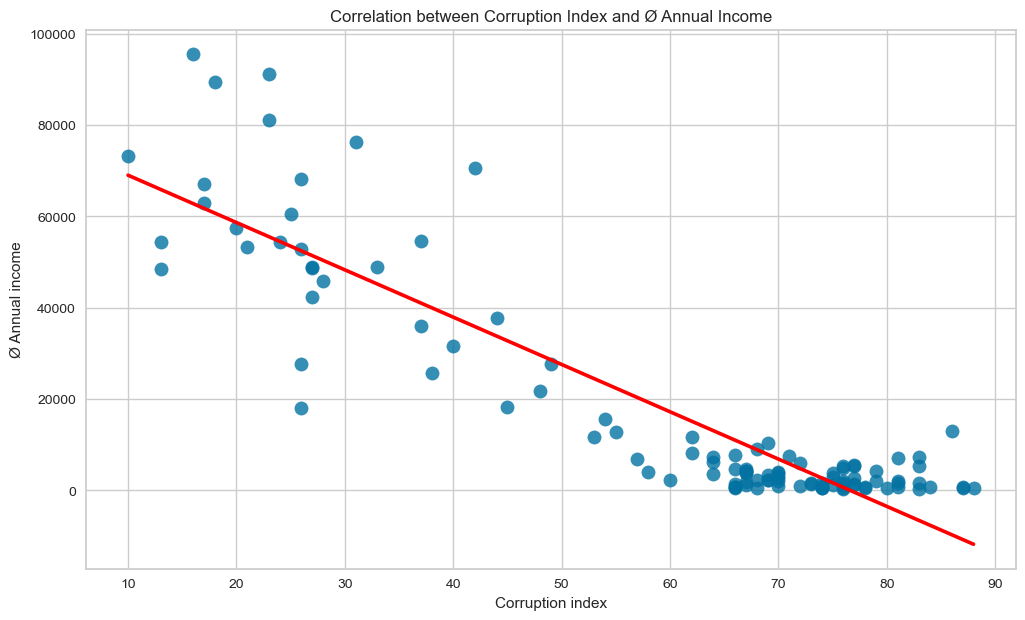

In [14]:
# Scatter plot
plt.figure(figsize=(12, 7))
sns.regplot(x='Corruption index', y='Ø Annual income', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)
plt.title('Correlation between Corruption Index and Ø Annual Income')
plt.xlabel('Corruption index')
plt.ylabel('Ø Annual income')
plt.grid(True)
plt.show()


- This value indicates a strong negative linear relationship between the two variables. 
- The corruption index of a country increases (indicating higher corruption), its average annual income tends to decrease, and vice versa.

# Clustering analysis

## Elbow method

/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

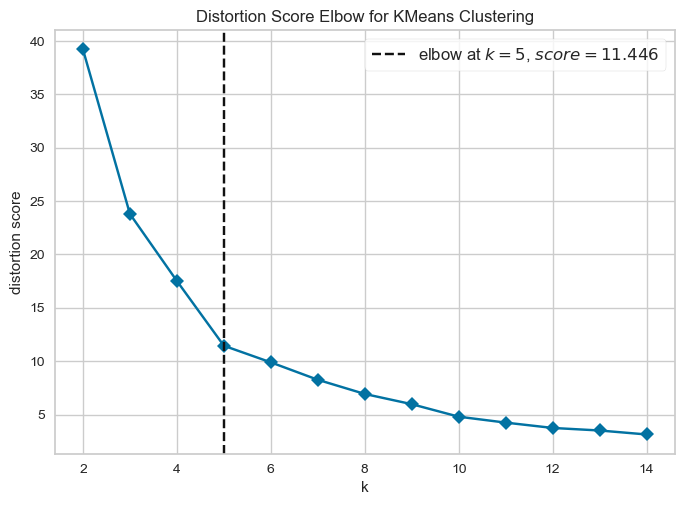

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#Elbow Method
sum_of_squared_distances = []

model = KMeans()
elbow_test = KElbowVisualizer(model, k=(2,15), timings= False)
elbow_test.fit(df_scaler) 
elbow_test.show()  

=> The number of cluster is 5

## K-Mean clustering

/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


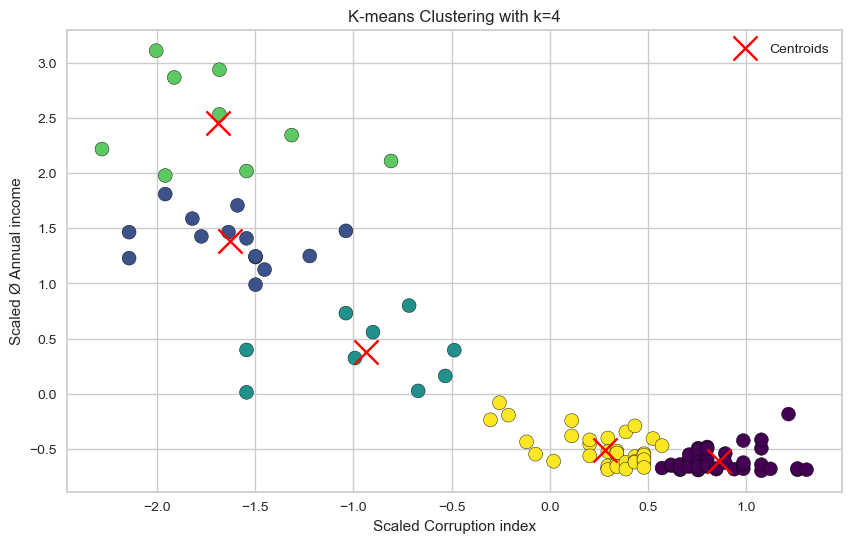

In [9]:
#K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaler)

plt.figure(figsize=(10, 6))
plt.scatter(df_scaler[:, 0], df_scaler[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel('Scaled Corruption index')
plt.ylabel('Scaled Ø Annual income')
plt.title('K-means Clustering with k=4')
plt.legend()
plt.grid(True)
plt.show()


We have 4 groups
- Cluster 0: High corruption and very low annual income.
- Cluster 1: Low to moderate corruption and high annual income, but not the highest.
- Cluster 2: Moderate corruption and moderate annual income.
- Cluster 3: Low corruption and the highest average annual income.
- Cluster 4: High corruption but slightly higher income compared to Cluster 0.

In [10]:
# The number of countries in each clusters
df['Cluster'] = clusters
df.groupby('Cluster').size()

Cluster
0    41
1    14
2     9
3     9
4    39
dtype: int64

# Validation

In [11]:
# Using Silhouette Score
silhouette_avg = silhouette_score(df_scaler, clusters)
print(f"The silhouette Score is : {silhouette_avg}")

The silhouette Score is : 0.49297899594894784


=> The Silhouette Score is approximately 0.493. This value is considered moderately good, suggesting that clusters are reasonably well-separated and cohesive.



# Profiling of clusters

## Descriptive statistic

In [12]:
# Compute descriptive statistics for each cluster
cluster_statistics = df.groupby('Cluster').agg({
    'Corruption index': ['mean', 'median', 'std', 'min', 'max'],
    'Ø Annual income': ['mean', 'median', 'std', 'min', 'max']
})

cluster_statistics


Corruption index                          Ø Annual income           \
                    mean median       std min max            mean   median   
Cluster                                                                      
0              78.341463   77.0  4.257991  72  88     2392.682927   1500.0   
1              24.142857   25.5  6.870865  13  37    52420.000000  53175.0   
2              39.222222   40.0  8.555375  26  49    27168.888889  27590.0   
3              22.888889   23.0  9.439868  10  42    79191.111111  76370.0   
4              65.666667   67.0  4.775669  53  72     4889.487179   3950.0   

                                         
                  std      min      max  
Cluster                                  
0         2595.189805    240.0  13080.0  
1         5625.576210  42440.0  62990.0  
2         7089.644639  18030.0  37700.0  
3        10623.288620  67200.0  95510.0  
4         3740.416490    510.0  15660.0

## Box plot for two indexs

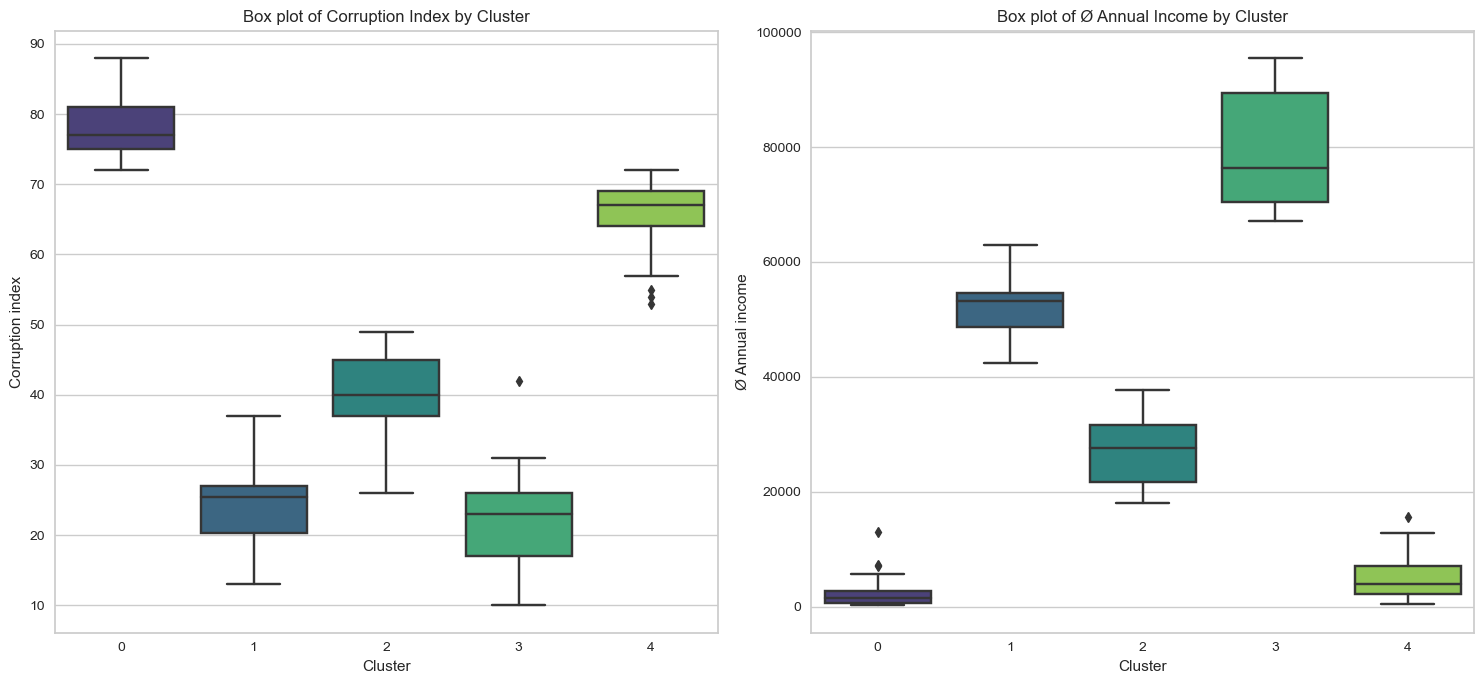

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.boxplot(x='Cluster', y='Corruption index', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Box plot of Corruption Index by Cluster')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Corruption index')

sns.boxplot(x='Cluster', y='Ø Annual income', data=df, ax=ax[1], palette='viridis')
ax[1].set_title('Box plot of Ø Annual Income by Cluster')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Ø Annual income')

plt.tight_layout()
plt.show()

- Cluster 0: "High Corruption, Very Low Income"
- Cluster 1: "Moderate Corruption, High Income"
- Cluster 2: "Moderate Corruption, Moderate Income"
- Cluster 3: "Low Corruption, Very High Income"
- Cluster 4: "High Corruption, Low Income"